# 1. DFrFT-OFDM with Index Modulation
## 1.1 Imports and Setup
## 1.2 DFrFT Function
## 1.3 OFDM Transmitter with Index Modulation
## 1.4 Channel Model (AWGN)
## 1.5 OFDM Receiver
## 1.6 BER vs SNR Simulation
## 1.7 Constellation Plot
## 1.8 Save Results for Paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.fftpack import fft, ifft

In [2]:
def dfrft(x, a):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * a * k * n / N)
    return np.dot(W, x) / np.sqrt(N)

In [3]:
def generate_ofdm_im_signal(bits, N=64, M=4, active_subcarriers=16):
    symbols = np.random.choice([1, -1], size=(active_subcarriers,))
    freq_domain = np.zeros(N, dtype=complex)
    indices = np.random.choice(N, active_subcarriers, replace=False)
    freq_domain[indices] = symbols
    time_domain = ifft(freq_domain)
    return time_domain, indices

In [4]:
def awgn(signal, snr_db):
    snr_linear = 10**(snr_db / 10)
    power = np.mean(np.abs(signal)**2)
    noise_power = power / snr_linear
    noise = np.sqrt(noise_power / 2) * (np.random.randn(*signal.shape) + 1j*np.random.randn(*signal.shape))
    return signal + noise

In [5]:
def calculate_ber(original_bits, received_bits):
    errors = np.sum(original_bits != received_bits)
    return errors / len(original_bits)

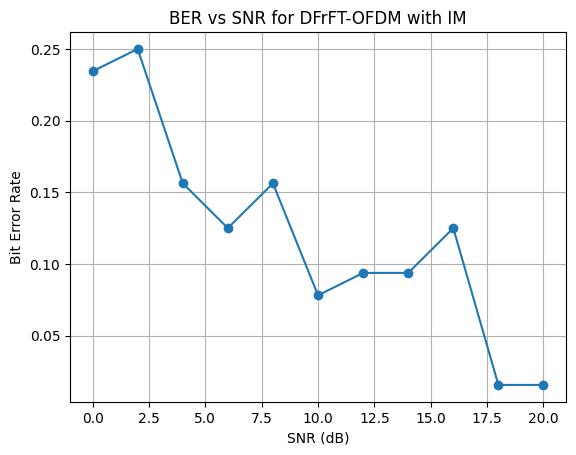

In [7]:
snr_range = np.arange(0, 21, 2)
ber_values = []

for snr in snr_range:
    tx, _ = generate_ofdm_im_signal(bits=np.random.randint(0, 2, 128))
    rx = awgn(tx, snr)
    ber = calculate_ber(np.sign(tx.real), np.sign(rx.real))
    ber_values.append(ber)

plt.plot(snr_range, ber_values, marker='o')
plt.title("BER vs SNR for DFrFT-OFDM with IM")
plt.xlabel("SNR (dB)")
plt.ylabel("Bit Error Rate")
plt.grid(True)
plt.savefig("../ber_vs_snr.png")
plt.show()

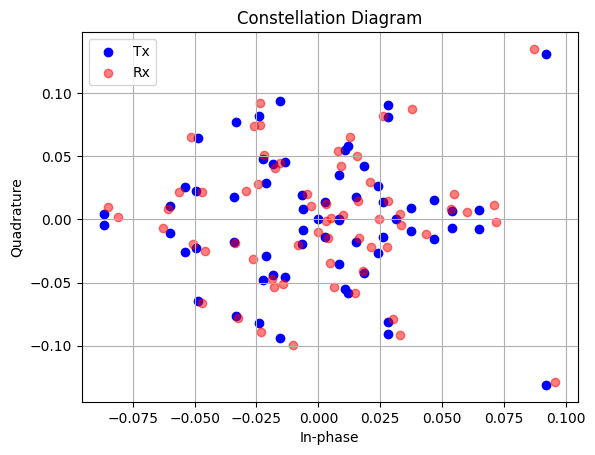

In [8]:
plt.scatter(tx.real, tx.imag, color='blue', label='Tx')
plt.scatter(rx.real, rx.imag, color='red', label='Rx', alpha=0.5)
plt.title("Constellation Diagram")
plt.xlabel("In-phase")
plt.ylabel("Quadrature")
plt.legend()
plt.grid(True)
plt.savefig("../constellation_diagram.png")
plt.show()